# CS 109A/AC 209A/STAT 121A Data Science: Data Driven March Madness Milestone #3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Saturday, November 6th, 2016 at 11:59pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import csv
from sklearn import linear_model
import sklearn.discriminant_analysis as da
%matplotlib inline

In [2]:
#notes
#regular season is like training set, tourney results are like testing set
#should boil down the regular season set with just tourney teams


**Loading in Each Dataframe and Examining the Heads:**

In [3]:
teams_df = pd.read_csv('datasets/Teams.csv', delimiter=',')
teams_df.head()
#teams_df.shape

,Team_Id,Team_Name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


In [4]:
seasons_df = pd.read_csv('datasets/Seasons.csv', delimiter = ',')
seasons_df.head()
#seasons_df.shape

,Season,Dayzero,Regionw,Regionx,Regiony,Regionz
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [5]:
seasons_results_detailed_df = pd.read_csv('datasets/RegularSeasonDetailedResults.csv', delimiter = ',')
seasons_results_detailed_df.head()
#seasons_results_detailed_df.shape

#X = seasons_results_detailed_df.as_matrix(columns = ['Wscore'])
#y = seasons_results_detailed_df.as_matrix(columns = ['status'])
#y = np.ravel(y)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [6]:
seasons_results_compact_df = pd.read_csv('datasets/RegularSeasonCompactResults.csv', delimiter = ',')
seasons_results_compact_df.head()
#seasons_results_compact_df.shape

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [7]:
tourney_results_detailed_df = pd.read_csv('datasets/TourneyDetailedResults.csv', delimiter = ',')
tourney_results_detailed_df.head()
#tourney_results_detailed_df.shape

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [8]:
tourney_results_compact_df = pd.read_csv('datasets/TourneyCompactResults.csv', delimiter = ',')
tourney_results_compact_df.head()
#tourney_results_compact_df.shape

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [9]:
tourney_seeds_df = pd.read_csv('datasets/TourneySeeds.csv', delimiter = ',')
tourney_seeds_df.head()
#tourney_seeds_df.shape


,Season,Seed,Team
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [10]:
tourney_slots_df = pd.read_csv('datasets/TourneySlots.csv', delimiter = ',')
tourney_slots_df.head()
#tourney_slots_df.shape

,Season,Slot,Strongseed,Weakseed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


In [11]:
sample_df = pd.read_csv('datasets/SampleSubmission.csv', delimiter = ',')
sample_df.head()
#sample_df.shape

,Id,Pred
0,2016_1112_1114,0.5
1,2016_1112_1122,0.5
2,2016_1112_1124,0.5
3,2016_1112_1138,0.5
4,2016_1112_1139,0.5


In [12]:
seasons_results_detailed_df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [13]:
tourney_results_detailed_df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [14]:
def add_to_csv(df_lst, m = 'a'):
    #write pandas to csv
    count = 2003
    if m == 'a':
        for df in df_lst:
            #create csv and add pandas, use name
            df.to_csv('datasets/toruney_selected_reg_season_detailed_results/reg_season/%s_regular_seas.csv'%count)
            count += 1
    else:
        for df in df_lst:
            #create csv and add pandas, use name
            df.to_csv('datasets/toruney_selected_reg_season_detailed_results/tourney/%s_tourney.csv'%count)
            count += 1

In [15]:
#below is to make my training sets of regular season data

In [16]:
#create a dictionary to store which teams were in which years
yearly_dfs = []
teams_per_year = {}
for i in range(2003, 2016, 1):
    teams_per_year[i] = []

for key, value in teams_per_year.iteritems():
    year = tourney_results_detailed_df[tourney_results_detailed_df.Season == key]
    wteam_array = year['Wteam']
    team_array = np.append(wteam_array, year['Lteam'])
    teams_per_year[key] = sorted(np.unique(team_array))

for key, value in teams_per_year.iteritems():
    _yearly_df = pd.DataFrame(columns = list(seasons_results_detailed_df.columns.values))
    for index, row in seasons_results_detailed_df[seasons_results_detailed_df.Season == key].iterrows():
        if row['Wteam'] in value or row['Lteam'] in value:
            _yearly_df = _yearly_df.append(row)
    yearly_dfs.append(_yearly_df)

In [17]:
tourney_dfs = []
for i in range(2003, 2016, 1):
    tourney_dfs.append(tourney_results_detailed_df[tourney_results_detailed_df.Season == i])

In [18]:
add_to_csv(tourney_dfs, m = 'd')

In [19]:
#outputted wrong set
add_to_csv(yearly_dfs)

Preliminary Model Setup

In [15]:
### Assemble Season Long Stats
leagueData = {}

for index, game in seasons_results_detailed_df.iterrows():
    year = int(game['Season'])
    winningTeam = int(game['Wteam'])
    losingTeam = int(game['Lteam'])
    
    winningTeamStats = {}
    losingTeamStats = {}
    
    # we potentially want average and standard deviation of point differentials
    pointDifferential = int(game['Wscore']) - int(game['Lscore'])
    winningTeamStats['pointDifferential'] = pointDifferential
    losingTeamStats['pointDifferential'] = pointDifferential * -1
    
    winningTeamStats['fieldGoalsMade'] = int(game['Wfgm'])
    losingTeamStats['fieldGoalsMade'] = int(game['Lfgm'])
    
    winningTeamStats['fieldGoalsAtt'] = int(game['Wfga'])
    losingTeamStats['fieldGoalsAtt'] = int(game['Lfga'])
    
    winningTeamStats['freeThrowsMade'] = int(game['Wftm'])
    losingTeamStats['freeThrowsMade'] = int(game['Lftm'])
    
    winningTeamStats['freeThrowAtt'] = int(game['Wfta'])
    losingTeamStats['freeThrowAtt'] = int(game['Lfta'])
    
    winningTeamStats['offReb'] = int(game['Wor'])
    losingTeamStats['offReb'] = int(game['Lor'])
    
    winningTeamStats['assists'] = int(game['Wast'])
    losingTeamStats['assists'] = int(game['Last'])
    
    winningTeamStats['turnovers'] = int(game['Wto'])
    losingTeamStats['turnovers'] = int(game['Lto'])
    
    winningTeamStats['defReb'] = int(game['Wdr'])
    losingTeamStats['defReb'] = int(game['Ldr'])
    
    winningTeamStats['steals'] = int(game['Wstl'])
    losingTeamStats['steals'] = int(game['Lstl'])
    
    winningTeamStats['blocks'] = int(game['Wblk'])
    losingTeamStats['blocks'] = int(game['Lblk'])  

    winningTeamStats['fieldGoalsAllowed'] = int(game['Lfgm'])
    losingTeamStats['fieldGoalsAllowed'] = int(game['Wfgm'])
    
    winningTeamStats['oppFieldGoalsAtt'] = int(game['Lfga'])
    losingTeamStats['oppFieldGoalsAtt'] = int(game['Wfga'])
    
    winningTeamStats['freeThrowsAllowed'] = int(game['Lftm'])
    losingTeamStats['freeThrowsAllowed'] = int(game['Wftm'])
    
    winningTeamStats['oppFreeThrowsAtt'] = int(game['Lfta'])
    losingTeamStats['oppFreeThrowsAtt'] = int(game['Wfta'])
    
    categories = ['pointDifferential', 'fieldGoalsMade', 'fieldGoalsAtt', 'freeThrowsMade',
                  'freeThrowAtt', 'offReb', 'assists', 'turnovers', 'defReb', 'steals', 
                 'blocks', 'fieldGoalsAllowed', 'oppFieldGoalsAtt', 'freeThrowsAllowed', 
                 'oppFreeThrowsAtt']
    
    if year not in leagueData:
        leagueData[year] = {}

    if winningTeam in leagueData[year]:
        for category in categories:
            leagueData[year][winningTeam][category] += winningTeamStats[category]
        leagueData[year][winningTeam]['totalGames'] += 1
    else:
        leagueData[year][winningTeam] = winningTeamStats
        leagueData[year][winningTeam]['totalGames'] = 1
        
    if losingTeam in leagueData[year]:
        for category in categories:
            leagueData[year][losingTeam][category] += winningTeamStats[category]
        leagueData[year][losingTeam]['totalGames'] += 1
    else:
        leagueData[year][losingTeam] = losingTeamStats
        leagueData[year][losingTeam]['totalGames'] = 1

for year in leagueData:
    for team in leagueData[year]:
        totalTeamGames = leagueData[year][team]['totalGames']

        for category in leagueData[year][team]:
            leagueData[year][team][category] = leagueData[year][team][category]/float(totalTeamGames)
            
#print len(leagueData)
print len(leagueData[2003])

327


In [16]:
def round_calc(tourney_df):
    rounds = [[], [], [], [], [], []]
    count = 0
    temp = []
    
    for index, row in tourney_df.iterrows():
        if row['Wteam'] in temp:# or row['Lteam'] in temp:
            count += 1
            temp = []
        rounds[count].append((row['Wteam'], row['Lteam']))
        temp.append(row['Wteam'])
        temp.append(row['Lteam'])
    
    return rounds

In [17]:
def actual_bracket(tourney_df):
    rounds = [[], [], [], [], [], []]
    temp = []
    count = 0
    
    for index, row in tourney_df.iterrows():
        if row['Wteam'] in temp:
            count += 1
            temp = []
        rounds[count].append(row['Wteam'])
        temp.append(row['Wteam'])
        
    return rounds        

In [18]:
def lower_seed_bracket(tourney_df, year):
    rounds = [[], [], [], [], [], []]
    temp = []
    count = 0
    
    for index, row in tourney_df.iterrows():
        if row['Wteam'] in temp:
            count += 1
            temp = []
        
        winningTeam = row['Wteam']
        losingTeam = row['Lteam']
        
        winningSeed = tourney_seeds_df[(tourney_seeds_df.Team == winningTeam) & (tourney_seeds_df.Season == year)].Seed
        losingSeed = tourney_seeds_df[(tourney_seeds_df.Team == losingTeam) & (tourney_seeds_df.Season == year)].Seed

        winningSeed = int(str(winningSeed)[9:11])
        losingSeed = int(str(losingSeed)[9:11])
        
        if winningSeed > losingSeed:
            rounds[count].append(row['Lteam'])
            temp.append(row['Lteam'])
        else:
            rounds[count].append(row['Wteam'])
            temp.append(row['Wteam'])
            
    return rounds       

In [19]:
#takes in two brackets and outputs
#takes in a list of sets with each rounds victories
#measures how accurate the bracket is
def weighted_accuracy_score(actual, predicted):
    score = 0
#     print actual
#     print predicted
    bth_pre = zip(actual, predicted)
    scalars = [0, 1, 2, 4, 8, 16]

    for index, rnd in enumerate(bth_pre):
        com = list(set(rnd[0]) & set(rnd[1]))
        score += len(com) * scalars[index]

    return score/112.0

In [20]:
#takes in two brackets and outputs
#takes in a list of sets with each rounds victories
#measures how accurate the bracket is
def accuracy_score(actual, predicted):
    score = 0
    bth_pre = zip(actual, predicted)

    for index, rnd in enumerate(bth_pre):
        com = list(set(rnd[0]) & set(rnd[1]))
        score += len(com)

    return score/63.0

In [21]:
#differnetial equation
#takes in two brackets and outputs
#takes in a list of sets with each rounds victories
#measures how different two brackets are
def differential_score(seed_pre, mod_pre):
    score = 0
    bth_pre = zip(seed_pre, mod_pre)
    for rnd in bth_pre:
        com = list(set(rnd[0]) & set(rnd[1]))
        score += (len(rnd[1]) - len(com))

    return score/63.0

In [64]:
import random

#general structure to modle this brackt
#this function can make a bracket based off of matchups
#takes in model, formats bracket
#if its a one, the first team wins and a 0 the second team wins
#
def bracket_create(year, model):
    brackets = []
    tourney = pd.read_csv('datasets/toruney_selected_reg_season_detailed_results/tourney/' + str(year) + '_tourney.csv', delimiter = ',')
    rounds = round_calc(tourney)
    actualBracket = actual_bracket(tourney)
    
    for i in range(20):
        bracketPredictions = [[], [], [], [], [], []]

        for index, rnd in enumerate(rounds):
            for matchup in rnd:
                team1 = matchup[0]
                team2 = matchup[1]

                team1Seed = tourney_seeds_df[(tourney_seeds_df.Team == team1) & (tourney_seeds_df.Season == year)].Seed
                team2Seed = tourney_seeds_df[(tourney_seeds_df.Team == team2) & (tourney_seeds_df.Season == year)].Seed

                team1Seed = int(str(team1Seed)[9:11])
                team2Seed = int(str(team2Seed)[9:11])

                team1Stats = leagueData[year][team1]
                team2Stats = leagueData[year][team2]

                matchupVector = [team1Stats[category] + team2Stats[category] for category in categories] + [team1Seed] + [team2Seed]

                probEstimates = dict(zip([1,0], model.predict_proba(np.array(matchupVector).reshape(1, -1))[0]))
                result = max(probEstimates.iterkeys(), key=(lambda x: probEstimates[x]))
                confidence = probEstimates[result]

                if result == 1:
                    if random.random() <= confidence:
                        bracketPredictions[index].append(team1)
                    else:
                        bracketPredictions[index].append(team2)
                else:
                    if random.random() <= confidence:
                        bracketPredictions[index].append(team2)
                    else:
                        bracketPredictions[index].append(team1)

        brackets.append((bracketPredictions, weighted_accuracy_score(actualBracket, bracketPredictions), accuracy_score(actualBracket, bracketPredictions)))
    bestWeightedBrackets = sorted(brackets, key=lambda x: x[1])[-3:]
    bestUnweightedBrackets = sorted(brackets, key=lambda x: x[2])[-3:]
    
    
    lowerSeedBracket = lower_seed_bracket(tourney, year)
    finalRankings = []
    for bracket in bestWeightedBrackets:
        variance = differential_score(lowerSeedBracket, bracket[0])
        finalRankings.append([bracket[0], bracket[1], variance])
    
    return max(finalRankings, key=lambda x: .8*x[1] + .2*x[2])

In [65]:
import random

#general structure to modle this brackt
#this function can make a bracket based off of matchups
#takes in model, formats bracket
#if its a one, the first team wins and a 0 the second team wins
#
def _bracket_create(year, model):
    brackets = []
    tourney = pd.read_csv('datasets/toruney_selected_reg_season_detailed_results/tourney/' + str(year) + '_tourney.csv', delimiter = ',')
    rounds = round_calc(tourney)
    actualBracket = actual_bracket(tourney)
    
    for i in range(20):
        bracketPredictions = [[], [], [], [], [], []]

        for index, rnd in enumerate(rounds):
            for matchup in rnd:
                team1 = matchup[0]
                team2 = matchup[1]

                team1Seed = tourney_seeds_df[(tourney_seeds_df.Team == team1) & (tourney_seeds_df.Season == year)].Seed
                team2Seed = tourney_seeds_df[(tourney_seeds_df.Team == team2) & (tourney_seeds_df.Season == year)].Seed

                team1Seed = int(str(team1Seed)[9:11])
                team2Seed = int(str(team2Seed)[9:11])

                team1Stats = leagueData[year][team1]
                team2Stats = leagueData[year][team2]

                matchupVector = [team1Stats[category] + team2Stats[category] for category in categories] + [team1Seed] + [team2Seed]

                probEstimates = dict(zip([1,0], model.predict_proba(np.array(matchupVector).reshape(1, -1))[0]))
                result = max(probEstimates.iterkeys(), key=(lambda x: probEstimates[x]))
                confidence = probEstimates[result]

                if result == 1:
                    if random.random() <= confidence:
                        bracketPredictions[index].append(team1)
                    else:
                        bracketPredictions[index].append(team2)
                else:
                    if random.random() <= confidence:
                        bracketPredictions[index].append(team2)
                    else:
                        bracketPredictions[index].append(team1)

        brackets.append((bracketPredictions, weighted_accuracy_score(actualBracket, bracketPredictions), accuracy_score(actualBracket, bracketPredictions)))
    #bestWeightedBrackets = sorted(brackets, key=lambda x: x[1])[-3:]
    #bestUnweightedBrackets = sorted(brackets, key=lambda x: x[2])[-3:]
    bestWeightedBrackets = sorted(brackets, key=lambda x: x[1])
    bestUnweightedBrackets = sorted(brackets, key=lambda x: x[2])
    
    
    lowerSeedBracket = lower_seed_bracket(tourney, year)
    finalRankings = []
    for bracket in bestWeightedBrackets:
        variance = differential_score(lowerSeedBracket, bracket[0])
        finalRankings.append([bracket[0], bracket[1], variance])
    
    #return max(finalRankings, key=lambda x: .8*x[1] + .2*x[2])
    return finalRankings

In [66]:
glb_mod = []

In [ ]:
logreg = None
for i in range(2003, 2013):
    trainingData = []
    for index, game in tourney_results_detailed_df.iterrows():
        matchupVector = []
        year = int(game['Season'])

        possibleYears = range(i, i+3)

        if year in possibleYears:
            winningTeam = int(game['Wteam'])
            losingTeam = int(game['Lteam'])
            winningTeamSeed = tourney_seeds_df[(tourney_seeds_df.Team == winningTeam) & (tourney_seeds_df.Season == year)].Seed
            losingTeamSeed = tourney_seeds_df[(tourney_seeds_df.Team == losingTeam) & (tourney_seeds_df.Season == year)].Seed

            winningTeamSeed = int(str(winningTeamSeed)[9:11])
            losingTeamSeed = int(str(losingTeamSeed)[9:11])

            winningTeamStats = leagueData[year][winningTeam]
            losingTeamStats = leagueData[year][losingTeam]

            matchupVector = [winningTeamStats[category] + losingTeamStats[category] for category in categories] + [winningTeamSeed] + [losingTeamSeed] + [1] 
            trainingData.append(matchupVector)

            matchupVector = [losingTeamStats[category] + losingTeamStats[category] for category in categories] + [losingTeamSeed] + [winningTeamSeed] + [0]
            trainingData.append(matchupVector)

    trainingData = np.array(trainingData)

    x_train = trainingData[:, :-1]
    y_train = trainingData[:, -1]

    logreg = linear_model.LogisticRegression()

    # train logistic regression model using data from 2003-2005
    logreg.fit(x_train, y_train)

    # test trained model on 2006 data
    testingData = []
    for index, game in tourney_results_detailed_df.iterrows():
        matchupVector = []
        year = int(game['Season'])

        if year == i+3:
            winningTeam = int(game['Wteam'])
            losingTeam = int(game['Lteam'])

            winningTeamSeed = tourney_seeds_df[(tourney_seeds_df.Team == winningTeam) & (tourney_seeds_df.Season == year)].Seed
            losingTeamSeed = tourney_seeds_df[(tourney_seeds_df.Team == losingTeam) & (tourney_seeds_df.Season == year)].Seed

            winningTeamSeed = int(str(winningTeamSeed)[9:11])
            losingTeamSeed = int(str(losingTeamSeed)[9:11])

            winningTeamStats = leagueData[year][winningTeam]
            losingTeamStats = leagueData[year][losingTeam]

            matchupVector = [winningTeamStats[category] + losingTeamStats[category] for category in categories] + [winningTeamSeed] + [losingTeamSeed] + [1] 
            testingData.append(matchupVector)

            matchupVector = [losingTeamStats[category] + losingTeamStats[category] for category in categories] + [losingTeamSeed] + [winningTeamSeed] + [0]
            testingData.append(matchupVector)

    testingData = np.array(testingData)
    x_test = testingData[:, :-1]
    y_test = testingData[:, -1]

    print "For predicting the", i+3, "March Madness results, we get an accuracy of:", logreg.score(x_test, y_test)
    
    bestBracket, weightedAccuracy, variance = bracket_create(i+3, logreg)
    print "The best bracket for", i+3, "is:", bestBracket
    print "The weighted score for this bracket is:", weightedAccuracy
    print "The variance for this bracket (from the lower seed baseline model) is:", variance
    
    if i+3 == 2007:
        glb_mod.append(weightedAccuracy)
        glb_mod.append(variance)

Change above function to change year our model shows. Change below to change year of the models we are automatically creating
My code starts below, should be able to run everything no problem

In [68]:
ran_brack = _bracket_create(2007, logreg)

In [69]:
#scores is a list of tuples, the first of each tuple is the accuracy score, second is the similarity score
scores = []
for brack in ran_brack:
    acc = brack[-2]
    sim = brack[-1]
    scores.append((acc, sim))

In [73]:
print scores
#just add our model and sort these when you enter
#THIS IS ONLY YEAR 2007
#them in the graph, sort by accuracy scores and we can see how similarity socres change
#acrually looks like they are already sorted
#SIMILARTIY IS HOW CLOSE THEY ARE TO THE BASELINE BRACKET IN TERMS OF SIMILAR GAMES PREDICTED
print glb_mod

[(0.15178571428571427, 0.7301587301587301), (0.15178571428571427, 0.6190476190476191), (0.22321428571428573, 0.5873015873015873), (0.22321428571428573, 0.6666666666666666), (0.25892857142857145, 0.6031746031746031), (0.2767857142857143, 0.6031746031746031), (0.29464285714285715, 0.6984126984126984), (0.29464285714285715, 0.6031746031746031), (0.3392857142857143, 0.7301587301587301), (0.3482142857142857, 0.6984126984126984), (0.35714285714285715, 0.6349206349206349), (0.35714285714285715, 0.5714285714285714), (0.36607142857142855, 0.6984126984126984), (0.39285714285714285, 0.5873015873015873), (0.39285714285714285, 0.5714285714285714), (0.39285714285714285, 0.6349206349206349), (0.4017857142857143, 0.5238095238095238), (0.4107142857142857, 0.6190476190476191), (0.4375, 0.6031746031746031), (0.45535714285714285, 0.5555555555555556)]
[0.45535714285714285, 0.7936507936507936]


In [71]:
#shared games of our random brackets to baseline seeded model
#have to add our model shared games
shr_game = []
for sc in scores:
    shr_game.append(63.0 - 63.0*sc[-1])

In [74]:
print shr_game
print 63.0 - 63.0*glb_mod[-1]

[17.0, 24.0, 26.0, 21.0, 25.0, 25.0, 19.0, 25.0, 17.0, 19.0, 23.0, 27.0, 19.0, 26.0, 27.0, 23.0, 30.0, 24.0, 25.0, 28.0]
13.0


In [84]:
#USE THIS TO MAP OUT CHANGES ACROSS THE YEARLY DATASET
#TAKES THE AVERAGES OF EACH YEAR AND ADS THEM TO THE LIST
#winning field goals made
wfeat_1 = 'Wfgm'
wfeat_1_list = []
#wining blocks
wfeat_2 = 'Wblk'
wfeat_2_list = []
#winning assits
wfeat_3 = 'Wast'
wfeat_3_list = []

#losing field goals made
lfeat_1 = 'Lfgm'
lfeat_1_list = []
#losing blocks
lfeat_2 = 'Lblk'
lfeat_2_list = []
#losing assits
lfeat_3 = 'Last'
lfeat_3_list = []
for year in range (2003, 2016, 1):
    season_df = pd.read_csv('datasets/toruney_selected_reg_season_detailed_results/reg_season/' + str(year) + '_regular_seas.csv', delimiter = ',')
    wfeat_1_list.append(season_df[wfeat_1].mean())
    wfeat_2_list.append(season_df[wfeat_2].mean())
    wfeat_3_list.append(season_df[wfeat_3].mean())
    
    lfeat_1_list.append(season_df[lfeat_1].mean())
    lfeat_2_list.append(season_df[lfeat_2].mean())
    lfeat_3_list.append(season_df[lfeat_3].mean())

In [25]:
seeds_06 = tourney_seeds_df[tourney_seeds_df.Season == 2006]
team2seed_dic = {}
for index, row in seeds_06.iterrows():
    try:
        team2seed_dic[int(row['Team'])] = int(row['Seed'][1:])
    except:
        team2seed_dic[int(row['Team'])] = int(row['Seed'][1:-1])

In [26]:
print team2seed_dic

{1449: 5, 1284: 16, 1285: 12, 1417: 2, 1163: 1, 1293: 14, 1423: 9, 1172: 15, 1301: 10, 1454: 11, 1305: 5, 1455: 7, 1181: 1, 1314: 3, 1137: 9, 1320: 10, 1331: 16, 1322: 14, 1452: 6, 1326: 2, 1437: 1, 1328: 6, 1457: 15, 1458: 9, 1203: 8, 1462: 14, 1335: 15, 1338: 5, 1211: 3, 1214: 16, 1400: 2, 1334: 13, 1228: 4, 1429: 12, 1207: 7, 1356: 11, 1102: 13, 1231: 6, 1104: 10, 1233: 13, 1234: 3, 1196: 3, 1412: 9, 1112: 8, 1242: 4, 1371: 10, 1116: 8, 1245: 12, 1246: 8, 1375: 14, 1380: 16, 1125: 15, 1361: 11, 1130: 4, 1261: 4, 1133: 13, 1393: 5, 1266: 7, 1107: 16, 1397: 2, 1143: 7, 1272: 1, 1401: 12, 1277: 6, 1206: 11}


In [27]:
tourney_2006 = pd.read_csv('datasets/toruney_selected_reg_season_detailed_results/tourney/2006_tourney.csv', delimiter = ',')
tourney_2006.head()
#seasons_results_compact_df.shape

,Unnamed: 0,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,193,2006,136,1104,90,1266,85,N,0,28,...,22,14,19,13,15,13,12,9,4,22
1,194,2006,136,1130,88,1334,76,N,2,29,...,25,14,18,14,23,18,15,4,2,22
2,195,2006,136,1181,70,1380,54,N,0,24,...,13,6,10,16,16,8,16,14,4,20
3,196,2006,136,1196,76,1375,50,N,0,29,...,20,3,6,7,24,8,16,7,3,17
4,197,2006,136,1203,88,1423,85,N,1,31,...,22,10,18,8,25,20,15,2,1,22


In [28]:
right = 0.0
tot = 0.0
for index, row in tourney_2006.iterrows():
    if team2seed_dic[row['Wteam']] < team2seed_dic[row['Lteam']]:
        right += 1
    tot += 1
print right/tot

0.666666666667


In [29]:
tourney_2007 = pd.read_csv('datasets/toruney_selected_reg_season_detailed_results/tourney/2007_tourney.csv', delimiter = ',')
print round_calc(tourney_2007)

[[(1130L, 1403L), (1139L, 1330L), (1207L, 1125L), (1231L, 1211L), (1257L, 1390L), (1268L, 1172L), (1277L, 1266L), (1314L, 1184L), (1326L, 1148L), (1338L, 1460L), (1401L, 1335L), (1417L, 1451L), (1433L, 1181L), (1435L, 1203L), (1450L, 1331L), (1462L, 1140L), (1196L, 1238L), (1242L, 1310L), (1246L, 1437L), (1272L, 1317L), (1305L, 1166L), (1332L, 1275L), (1345L, 1112L), (1356L, 1221L), (1397L, 1253L), (1400L, 1308L), (1424L, 1210L), (1425L, 1116L), (1438L, 1107L), (1439L, 1228L), (1457L, 1323L), (1458L, 1394L)], [(1139L, 1268L), (1207L, 1130L), (1314L, 1277L), (1326L, 1462L), (1338L, 1433L), (1401L, 1257L), (1417L, 1231L), (1435L, 1450L), (1196L, 1345L), (1242L, 1246L), (1272L, 1305L), (1332L, 1457L), (1356L, 1439L), (1397L, 1438L), (1424L, 1458L), (1425L, 1400L)], [(1242L, 1356L), (1272L, 1401L), (1326L, 1397L), (1417L, 1338L), (1196L, 1139L), (1207L, 1435L), (1314L, 1425L), (1332L, 1424L)], [(1326L, 1272L), (1417L, 1242L), (1196L, 1332L), (1207L, 1314L)], [(1196L, 1417L), (1326L, 1207L)

**Map out a graph featuring the two accuracies with different models (like AIC/BIC, or comparing both R^2 - line graph):**

ValueError: x and y must have same first dimension

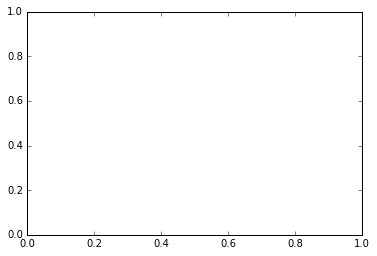

In [30]:
import math

years = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

fgWinningAverages = []
fgLosingAverages = []
for year in years:
    cut_year = seasons_results_detailed_df[seasons_results_detailed_df['Season'] == year]

    win_fg = cut_year['Wfgm']
    win_figa = cut_year['Wfga']

    los_fg = cut_year['Lfgm']
    los_figa = cut_year['Lfga']
    
    winPerc = win_fg.div(win_figa)
    losPerc = los_fg.div(los_figa)
    
    fgWinningAverages.append(winPerc.mean())
    fgLosingAverages.append(losPerc.mean())

plt.plot(years, winningTeamStats['pointDifferential'], color='b', label='Winning Team')
plt.plot(years, losingTeamStats['pointDifferential'], color='g', label='Losing Team')
plt.xlabel("Year")
plt.ylabel("Average FG%")
plt.legend(loc='best')
plt.title("Average FG% Over Time")
plt.show()